<a href="https://colab.research.google.com/github/moriahsantiago/moriahsantiago/blob/main/DSMDLP_Module1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: Introduction to the Course
In this assignment, your goal is to examine relationships between several learning and performance measures collected from middle school students interacting with the ASSISTments digital learning platform. This assignment will help familiarize you with Google Colab as a programming environment and introduce you to several concepts which will be explored more deeply later in the course.

For this assignment, our goal is to train a model to predict whether students are likely to complete their next math assignment.

## Dataset

This assignment will utilize student data collected from the ASSISTments digital learning platform. The dataset contains data from 18,345 unique students across 37,268 assignments. For each of these, our goal is to predict whether each student will complete the assignment using their past performance and behavior in the system. Several student level features have been aggregated for each student up to the moment that they were given the target assignment, and we want to examine whether this information can be used to predict their future performance (as measured by completion of the next assignment).

**The dataset can be downloaded from Canvas or using this direct link:
[ASSISTments Assignments Dataset](https://drive.google.com/file/d/1oEEKSkDPn8RBM6oa9eNmXYIFBmxqFQBm/view?usp=sharing)**

The dataset used in this assignment has been sampled from a larger publicly-available dataset published in the International Conference on Educational Data Mining:

[Prihar, E., Syed, M., Ostrow, K., Shaw, S., Sales, A., & Heffernan, N. (2022, July). Exploring common trends in online educational experiments. *In Proceedings of the 15th International Conference on Educational Data Mining.*](https://educationaldatamining.org/edm2022/proceedings/2022.EDM-long-papers.3/index.html)

**A description of each column and further context for the data can be found in that paper.**


#Data Descriptives
Download the **assistments_control_assignments_with_priors.csv** file from Canvas or the link above. Run the first code cell below to upload the dataset. The second code cell below uses the pandas library to read the file into a Dataframe and displays the number of rows and columns as well as a sample of the loaded data.




In [ ]:
from google.colab import files
dataset = files.upload()
filename = list(dataset.keys())[0]
print(f"{filename} has been uploaded")

Saving assistments_control_assignments_with_priors.csv to assistments_control_assignments_with_priors (5).csv
assistments_control_assignments_with_priors (5).csv has been uploaded


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(filename)

# Drop rows with missing values
df = df.dropna()

# Print the shape of the dataset
print("\nShape of the dataset (rows, columns):", df.shape)

# Display a sample of the dataset
df



Shape of the dataset (rows, columns): (37268, 34)


,problem_set_id,student_id,assignment_completed,normalized_student_learning,0_student_prior_skill_builders,0_student_prior_problem_sets,0_student_prior_attempted_problems,0_student_prior_completed_problems,student_prior_started_skill_builder_count,student_prior_skill_builder_percent_completed,...,class_prior_skill_builder_percent_completed,class_prior_started_problem_set_count,class_prior_problem_set_percent_completed,class_prior_completed_problem_count,class_prior_median_first_response_time,class_prior_median_time_on_task,class_prior_average_attempt_count,class_prior_average_correctness,teacher_account_age_in_days,opportunity_zone
0,PSAUUKY,120915,1,0.895579,1,0,0,0,0,0.000,...,0.000000,1942.857143,77.205882,3248,25.5405,33.1140,1.314039,0.666436,75,1
1,PSAUUKY,120915,1,0.895579,1,0,0,0,0,0.000,...,0.000000,1942.857143,77.205882,3248,25.5405,33.1140,1.314039,0.666436,75,1
2,PSAUUKY,307046,1,0.895579,1,0,0,0,0,0.000,...,0.000000,1942.857143,77.205882,3248,25.5405,33.1140,1.314039,0.666436,76,1
3,PSAUUKY,307046,1,0.895579,1,0,0,0,0,0.000,...,0.000000,1942.857143,77.205882,3248,25.5405,33.1140,1.314039,0.666436,76,1
4,PSAUUKY,137672,1,0.895579,1,0,0,0,0,0.000,...,0.000000,1942.857143,77.205882,3248,25.5405,33.1140,1.314039,0.666436,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37263,PSA25TA,1035779,1,-0.125259,0,1,0,0,8,0.875,...,91.914894,0.000000,0.000000,1878,17.7130,25.9645,1.834398,0.567093,508,1
37264,PSA25TA,1031811,1,1.128823,0,1,0,0,10,1.000,...,91.914894,0.000000,0.000000,1878,17.7130,25.9645,1.834398,0.567093,508,1
37265,PSA25TA,1035614,0,-1.379341,0,1,0,0,10,1.000,...,90.306122,0.000000,0.000000,1435,20.6370,29.8810,1.717770,0.567944,508,1
37266,PSA25TA,1035616,1,1.128823,0,1,0,0,10,1.000,...,90.306122,0.000000,0.000000,1435,20.6370,29.8810,1.717770,0.567944,508,1


#Descriptive Statistics

The code cell below identifies all the potential features that are available for us to use for each student; these represent aggregations of prior performance and other measures within the digital learning platform.

Let's start by displaying some common statistics for each of these features. The mean has been calculated for you. **Complete the code by calculating the standard deviation, min, and max values for each column and displaying these in a table.**

*Terminology Check: different fields of study will use different terms to refer to the various "features" of our dataset. Depending on use, these are also sometimes called "predictors" (particularly when used in prediction modeling), "variables" (e.g. "dependent variables" and "independent variables"), or "covariates." While these are often used interchangably in practice, there is a specific meaning behind these in different use-cases (this will be further defined later in the course). For now, we will use "dependent variable" to refer to the measure that we want to predict, and the general term "features" to refer to the measurs that we will use to predict our dependent variable.*

In [ ]:
# The list of all potential features we can utilize
# Note: class- and teacher-level variables are omitted for this assignment,
# but these may be useful in other contexts.
potential_features = ['0_student_prior_skill_builders',
                     '0_student_prior_problem_sets',
                     '0_student_prior_attempted_problems',
                     '0_student_prior_completed_problems',
                     'student_prior_started_skill_builder_count',
                     'student_prior_skill_builder_percent_completed',
                     'student_prior_started_problem_set_count',
                     'student_prior_problem_set_percent_completed',
                     'student_prior_completed_problem_count',
                     'student_prior_median_first_response_time',
                     'student_prior_median_time_on_task',
                     'student_prior_average_attempt_count',
                     'student_prior_average_correctness',
                     'opportunity_zone']

dependent_variable = "assignment_completed"
df_features = df[potential_features]

# Calculate descriptive statistics for each feature
stats = {}
stats['Mean'] = df_features.mean(numeric_only=True)
stats['SD'] = df_features.std(numeric_only=True)
stats['Min'] = df_features.min(numeric_only=True)
stats['Max'] = df_features.max(numeric_only=True)

# Create a DataFrame with the statistics
feature_statistics = pd.DataFrame(stats)

# Print the statistics table
print(f"The dataset contains a total of {len(df)} rows and {len(df.columns)} columns")
print(f"{len(potential_features)} potential feature columns have been identified:")
print(feature_statistics.round(2))
print("==========")
print(f"Dependent Measure: {dependent_variable}")
print(f"{round(df[dependent_variable].mean()*100, 2)}% of the {df[dependent_variable].sum()} total assignments were completed")

# Find and print the largest Max value
largest_max_value = stats['Max'].max()  # Find the largest max value
print(f"The largest Max value is: {round(largest_max_value, 2)}")

The dataset contains a total of 37268 rows and 34 columns
14 potential feature columns have been identified:
                                                 Mean       SD  Min        Max
0_student_prior_skill_builders                   0.19     0.40  0.0       1.00
0_student_prior_problem_sets                     0.24     0.43  0.0       1.00
0_student_prior_attempted_problems               0.06     0.24  0.0       1.00
0_student_prior_completed_problems               0.06     0.24  0.0       1.00
student_prior_started_skill_builder_count        6.45     8.73  0.0     102.00
student_prior_skill_builder_percent_completed    0.65     0.40  0.0       1.00
student_prior_started_problem_set_count         18.26    30.63  0.0     520.00
student_prior_problem_set_percent_completed      0.63     0.42  0.0       1.00
student_prior_completed_problem_count          175.76   268.13  0.0    3032.00
student_prior_median_first_response_time        97.14  5148.59  0.0  605490.87
student_prior_median_t

#Feature Correlations

It is sometimes helpful to further explore your data to examine the relationships between features. Later in this assignment, we will be using a logistic regression model which, among other assumptions, may be particularly sensitive to the inclusion of sets of features which are highly correlated with each other. We can use a confusion matrix to examine the correlations between all pairs of features in our data.

*Note: we use a Spearman's Rho correlation here, rather than the common Pearson correlation. Spearman's Rho is a "rank-order" correlation metric that is less sensitive to non-normal data distributions.*

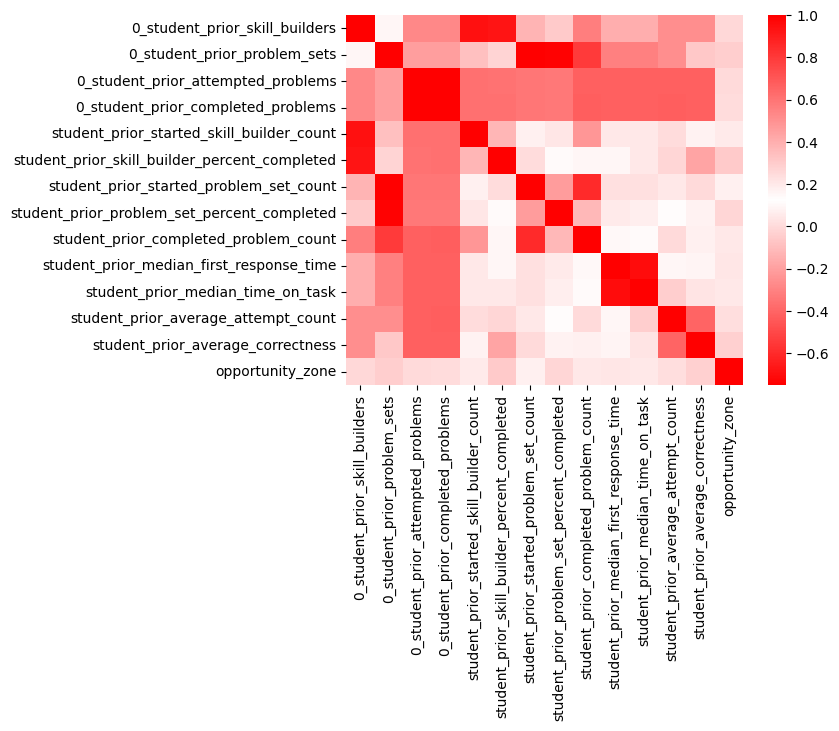

Highly correlated feature pairs:
- 0_student_prior_skill_builders -- student_prior_started_skill_builder_count
- 0_student_prior_skill_builders -- student_prior_skill_builder_percent_completed
- 0_student_prior_problem_sets -- student_prior_started_problem_set_count
- 0_student_prior_problem_sets -- student_prior_problem_set_percent_completed
- 0_student_prior_attempted_problems -- 0_student_prior_completed_problems
- student_prior_started_problem_set_count -- student_prior_completed_problem_count
- student_prior_median_first_response_time -- student_prior_median_time_on_task
Number of highly correlated feature pairs (threshold ≥ 0.6): 7
Number of highly correlated feature pairs (threshold ≥ 0.6): 7
Feature pair: 0_student_prior_skill_builders -- student_prior_started_skill_builder_count
Feature pair: 0_student_prior_skill_builders -- student_prior_skill_builder_percent_completed
Feature pair: 0_student_prior_problem_sets -- student_prior_started_problem_set_count
Feature pair: 0_stude

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Compute the correlation matrix
corr_matrix = df_features.corr(method='spearman')

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list('red_white_red', ['red', 'white', 'red'], N=256)

# Visualize the correlation matrix without annotations
sns.heatmap(corr_matrix, annot=False, cmap=cmap)
plt.show()

# Set the threshold for high correlation
threshold = 0.6

# List to hold pairs of highly correlated features
highly_correlated_pairs = []

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Suggested features to remove (keeping one from each pair)
features_to_remove = set()
print("Highly correlated feature pairs:")
for pair in highly_correlated_pairs:
    print(f"- {pair[0]} -- {pair[1]}")
# Count the number of highly correlated feature pairs
num_highly_correlated_pairs = len(highly_correlated_pairs)
print(f"Number of highly correlated feature pairs (threshold ≥ 0.6): {num_highly_correlated_pairs}")
# Count the number of highly correlated feature pairs
num_highly_correlated_pairs = len(highly_correlated_pairs)
print(f"Number of highly correlated feature pairs (threshold ≥ 0.6): {num_highly_correlated_pairs}")

# Optional: Display the actual pairs for reference
for pair in highly_correlated_pairs:
    print(f"Feature pair: {pair[0]} -- {pair[1]}")

# Feature Selection

In addition to displaying the correlation matrix, the code above also identifies the pairs of features that exhibit correlations with an absolute value above a certain threshold (0.6, by default). Our goal at the end of this assignment is to train a logistic regression to predict assignment completion, but our correlation analysis suggests we should omit several features.

Use the correlation analysis to refine the set of selected features below. From the list of features in the next code cell, remove one feature from each of the highly-correlated pairs identified in the previous code cell.

In [ ]:
from sklearn.model_selection import train_test_split

dependent_variable = "assignment_completed"
# Reintroducing previously removed features
selected_features = [
    '0_student_prior_completed_problems',
    'student_prior_started_skill_builder_count',  # Added back
    'student_prior_skill_builder_percent_completed',
    'student_prior_problem_set_percent_completed',
    'student_prior_completed_problem_count',
    'student_prior_median_first_response_time',  # Added back
    'student_prior_average_attempt_count',
    'student_prior_average_correctness',
    'opportunity_zone'
]

print("Features with highly correlated variables reintroduced:")
for feature in selected_features:
    print(f"- {feature}")


Features with highly correlated variables reintroduced:
- 0_student_prior_completed_problems
- student_prior_started_skill_builder_count
- student_prior_skill_builder_percent_completed
- student_prior_problem_set_percent_completed
- student_prior_completed_problem_count
- student_prior_median_first_response_time
- student_prior_average_attempt_count
- student_prior_average_correctness
- opportunity_zone


#Logistic Regression

With our set of selected features, we can now train a logistic regression model to predict students' assignment completion. While we will explore these concepts further throughout the course, we evaluate the model by splitting our data into a "training" set and a hold out "testing" set. The code cell below trains the model and uses three common performance metrics of Accuracy, Cohen's Kappa, and the Area Under the Receiver operating characteristic Curve (AUC). The output of this cell also shows the learned coefficients, measuring the magnitude and directionality of the relationship of each feature with the dependent variable, and other useful statistics. Run the code below and inspect the result. What happens if you use a different feature set?

*Note: We choose to use a logistic regression here rather than a linear regression because our goal is a "binary classification" task (e.g. our dependent variable either has a value of '1' to indicate that the student completed the assignment or a value of '0' to indicate that the student didn't complete the assignment, and our goal is to predict which of these scenarios is likely to happen).*

*Note: AUC, or sometimes AUC ROC, is a common performance metric for prediction modeling which will be explored further in the next module. A common calculation of this metric is also referred to as A' ("A Prime"), which is often equivalent to AUC except in some rare edge-cases.*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_auc_score
import numpy as np
import pandas as pd

# Reintroducing previously removed features
selected_features_full = [
    '0_student_prior_completed_problems',
    'student_prior_started_skill_builder_count',  # Added back
    'student_prior_skill_builder_percent_completed',
    'student_prior_problem_set_percent_completed',
    'student_prior_completed_problem_count',
    'student_prior_median_first_response_time',  # Added back
    'student_prior_average_attempt_count',
    'student_prior_average_correctness',
    'opportunity_zone'
]

# Define X and y using the expanded feature set
X_full = df[selected_features_full]  # Ensure df is properly loaded first
y = df[dependent_variable]

# ✅ Step 1: Split the dataset (Must be done before scaling)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.2, random_state=42)

# ✅ Step 2: Scale features to help with convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)  # Now properly defined
X_test_scaled = scaler.transform(X_test_full)  # Now properly defined

# ✅ Step 3: Train logistic regression with higher iterations
lr_model_full = LogisticRegression(max_iter=5000)
lr_model_full.fit(X_train_scaled, y_train_full)

# ✅ Step 4: Extract and sort coefficients
coefficients_full = np.concatenate([lr_model_full.intercept_, lr_model_full.coef_[0]])
coef_df_full = pd.DataFrame({
    'Feature': ['Intercept'] + selected_features_full,
    'Coefficient': coefficients_full
})
coef_df_full['Abs_Coefficient'] = coef_df_full['Coefficient'].abs()
coef_df_sorted_full = coef_df_full.sort_values(by='Abs_Coefficient', ascending=False)

# ✅ Step 5: Print performance metrics
y_pred_full = lr_model_full.predict(X_test_scaled)
y_pred_proba_full = lr_model_full.predict_proba(X_test_scaled)[:, 1]
accuracy_full = accuracy_score(y_test_full, y_pred_full)
kappa_full = cohen_kappa_score(y_test_full, y_pred_full)
auc_full = roc_auc_score(y_test_full, y_pred_proba_full)

performance_full = pd.DataFrame({'Metric': ['Accuracy', 'Kappa', 'AUC'],
                                 'Value': [accuracy_full, kappa_full, auc_full]})

print("\nPerformance Metrics with All Features Included:")
print(performance_full)

print("\nCoefficients sorted by absolute value (with all features):")
print(coef_df_sorted_full)


Performance Metrics with All Features Included:
     Metric     Value
0  Accuracy  0.776630
1     Kappa  0.099819
2       AUC  0.685375

Coefficients sorted by absolute value (with all features):
                                         Feature  Coefficient  Abs_Coefficient
0                                      Intercept     1.315684         1.315684
8              student_prior_average_correctness     0.476328         0.476328
1             0_student_prior_completed_problems     0.467881         0.467881
3  student_prior_skill_builder_percent_completed     0.438985         0.438985
4    student_prior_problem_set_percent_completed     0.325863         0.325863
2      student_prior_started_skill_builder_count    -0.128766         0.128766
9                               opportunity_zone    -0.074797         0.074797
5          student_prior_completed_problem_count    -0.070443         0.070443
7            student_prior_average_attempt_count    -0.021353         0.021353
6       stude